In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv('Insights.csv')
raw_data.head()

,Date,HS Code,Product,Specific Product,Port of Origin,Country of Destination,Port of Destination,Value(USD),Std Qty,Std Unit,Std Unit Price(USD),Qty,Unit,Value In FC,Unit Rate In FC,Unit Rate Currency,Value(INR),Shipment Mode,Invoice Value INR
0,31-Jan-20,42022110,LADIES LEATHER HAND BAG 100% COW LEATHER SAC C...,Leather,JNPT,France,Le Havre,1543.70,86.0,NOS,17.95,86.0,PCS,1543.7,17.95,USD,107981.82,Sea,0.0
1,31-Jan-20,42022110,BAG,Leather,JNPT,Japan,Kobe,3074.75,710.0,NOS,4.33,710.0,PCS,3074.3,4.33,USD,215078.96,Sea,0.0
2,28-Jan-20,42022110,COW NAPPA LEATHER HAND BAG ORDER NO.2167,Leather,JNPT,Spain,Algeciras,2487.49,100.0,NOS,24.87,100.0,PCS,2365.0,23.65,EUR,174000.00,Sea,0.0
3,28-Jan-20,42022110,COW NAPPA LEATHER HAND BAG ORDER NO.2213,Leather,JNPT,Spain,Algeciras,1529.66,100.0,NOS,15.30,100.0,PCS,1450.0,14.50,EUR,107000.00,Sea,0.0
4,28-Jan-20,42022110,COW NAPPA LEATHER HAND BAG ORDER NO.1132,Leather,JNPT,Spain,Algeciras,2558.97,70.0,NOS,36.56,70.0,PCS,2436.0,34.80,EUR,179000.00,Sea,0.0


In [3]:
raw_data.describe(include='all')

,Date,HS Code,Product,Specific Product,Port of Origin,Country of Destination,Port of Destination,Value(USD),Std Qty,Std Unit,Std Unit Price(USD),Qty,Unit,Value In FC,Unit Rate In FC,Unit Rate Currency,Value(INR),Shipment Mode,Invoice Value INR
count,4973,4.973000e+03,4973,4973,4972,4971,4971,4971.000000,4971.000000,4971,4971.000000,4971.000000,4971,4971.000000,4971.000000,4971,4.971000e+03,4971,4971.0
unique,92,NaN,3815,6,4,16,92,NaN,NaN,5,NaN,NaN,9,NaN,NaN,9,NaN,2,NaN
top,21-Jan-20,NaN,COW LEATHER HAND BAG,Cotton,JNPT,France,Hamburg,NaN,NaN,NOS,NaN,NaN,PCS,NaN,NaN,USD,NaN,Sea,NaN
freq,147,NaN,34,1784,4445,793,487,NaN,NaN,4911,NaN,NaN,4620,NaN,NaN,2537,NaN,4448,NaN
mean,NaN,4.202253e+07,NaN,NaN,NaN,NaN,NaN,4716.822159,2242.921925,NaN,12.571259,2240.752116,NaN,4965.662426,21.042014,NaN,3.323365e+05,NaN,0.0
std,NaN,1.607116e+03,NaN,NaN,NaN,NaN,NaN,10478.410839,11621.412386,NaN,15.065920,11621.532685,NaN,13173.436074,89.999409,NaN,7.388925e+05,NaN,0.0
min,NaN,4.202111e+07,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000e+00,NaN,0.0
25%,NaN,4.202219e+07,NaN,NaN,NaN,NaN,NaN,421.415000,52.000000,NaN,2.380000,52.000000,NaN,475.000000,2.450000,NaN,2.969242e+04,NaN,0.0
50%,NaN,4.202222e+07,NaN,NaN,NaN,NaN,NaN,1435.560000,190.000000,NaN,7.150000,189.000000,NaN,1476.000000,7.250000,NaN,1.009449e+05,NaN,0.0
75%,NaN,4.202229e+07,NaN,NaN,NaN,NaN,NaN,4180.830000,600.000000,NaN,17.870000,600.000000,NaN,4138.750000,18.150000,NaN,2.947755e+05,NaN,0.0


In [4]:
# column_name_to_drop = raw_data.columns.tolist()
# print(column_name_to_drop)
data = raw_data.drop(['Date', 'HS Code', 'Product', 'Specific Product', 'Port of Origin', 'Country of Destination', 'Port of Destination', 'Value(USD)', 'Std Qty', 'Std Unit', 'Std Unit Price(USD)', 'Unit', 'Value In FC', 'Unit Rate Currency', 'Value(INR)', 'Shipment Mode', 'Invoice Value INR'],axis=1)
data.describe(include='all')

,Qty,Unit Rate In FC
count,4971.000000,4971.000000
mean,2240.752116,21.042014
std,11621.532685,89.999409
min,0.000000,0.000000
25%,52.000000,2.450000
50%,189.000000,7.250000
75%,600.000000,18.150000
max,300000.000000,2224.000000


In [5]:
data.isnull().sum()

Qty                2
Unit Rate In FC    2
dtype: int64

In [6]:
data_no_mv = data.dropna(axis=0)

In [7]:
data_no_mv.describe(include='all')
data_no_mv.isnull().sum()

Qty                0
Unit Rate In FC    0
dtype: int64

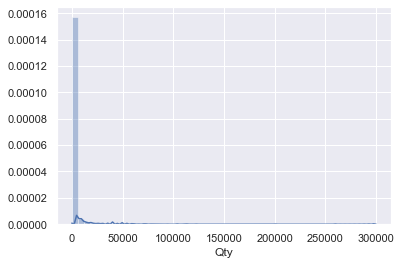

In [8]:
sns.distplot(data_no_mv['Qty'])

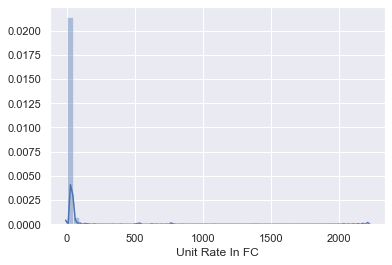

In [9]:
sns.distplot(data_no_mv['Unit Rate In FC'])

In [10]:
q = data_no_mv['Unit Rate In FC'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Unit Rate In FC']<q]
data_1.describe(include='all')

,Qty,Unit Rate In FC
count,4920.000000,4920.000000
mean,2263.814789,13.032114
std,11679.402805,18.553496
min,0.000000,0.000000
25%,58.750000,2.400000
50%,195.000000,7.010000
75%,600.000000,17.370000
max,300000.000000,404.000000


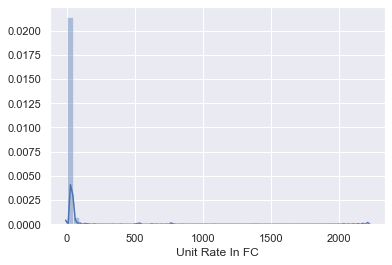

In [11]:
sns.distplot(data_no_mv['Unit Rate In FC'])

In [12]:
q = data_no_mv['Qty'].quantile(0.99)
data_2 = data_no_mv[data_no_mv['Qty']<q]
data_2.describe(include='all')

,Qty,Unit Rate In FC
count,4917.000000,4917.000000
mean,1289.169976,21.266268
std,4312.974722,90.466766
min,0.000000,0.000000
25%,50.000000,2.590000
50%,180.000000,7.500000
75%,578.000000,18.500000
max,48000.000000,2224.000000


In [13]:
data_cleaned = data_2.reset_index(drop=True)

In [14]:
data_cleaned.describe(include = 'all')

,Qty,Unit Rate In FC
count,4917.000000,4917.000000
mean,1289.169976,21.266268
std,4312.974722,90.466766
min,0.000000,0.000000
25%,50.000000,2.590000
50%,180.000000,7.500000
75%,578.000000,18.500000
max,48000.000000,2224.000000


Text(0.5, 1.0, 'Qty and Unit Rate In FC')

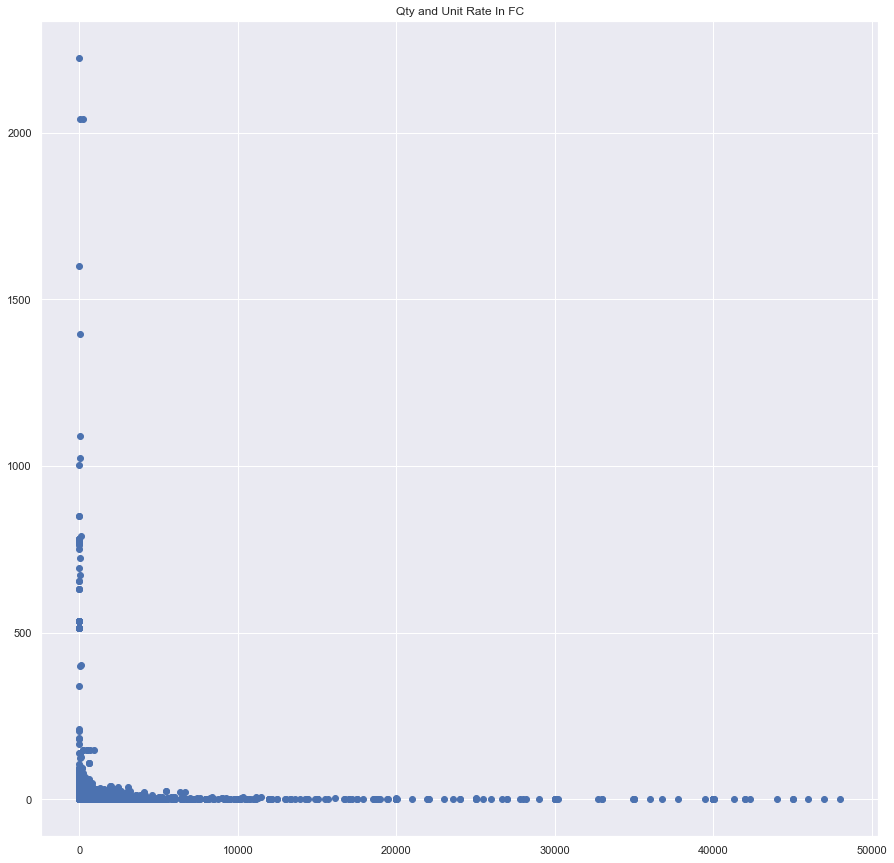

In [15]:
f,(ax1) = plt.subplots(1,1,sharey=True,figsize=(15,15))
ax1.scatter(data_cleaned['Qty'],data_cleaned['Unit Rate In FC'])
ax1.set_title('Qty and Unit Rate In FC')

In [16]:
log_Unit_Rate_In_FC = np.log(data_cleaned['Unit Rate In FC'])
data_cleaned['log Unit Rate In FC'] = log_Unit_Rate_In_FC
data_cleaned

C:\Users\harsh\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Qty,Unit Rate In FC,log Unit Rate In FC
0,86.0,17.95,2.887590
1,710.0,4.33,1.465568
2,100.0,23.65,3.163363
3,100.0,14.50,2.674149
4,70.0,34.80,3.549617
...,...,...,...
4912,18.0,6.50,1.871802
4913,12.0,9.50,2.251292
4914,12.0,9.50,2.251292
4915,3032.0,2.90,1.064711


Text(0.5, 1.0, 'Qty and log Unit Rate In FC')

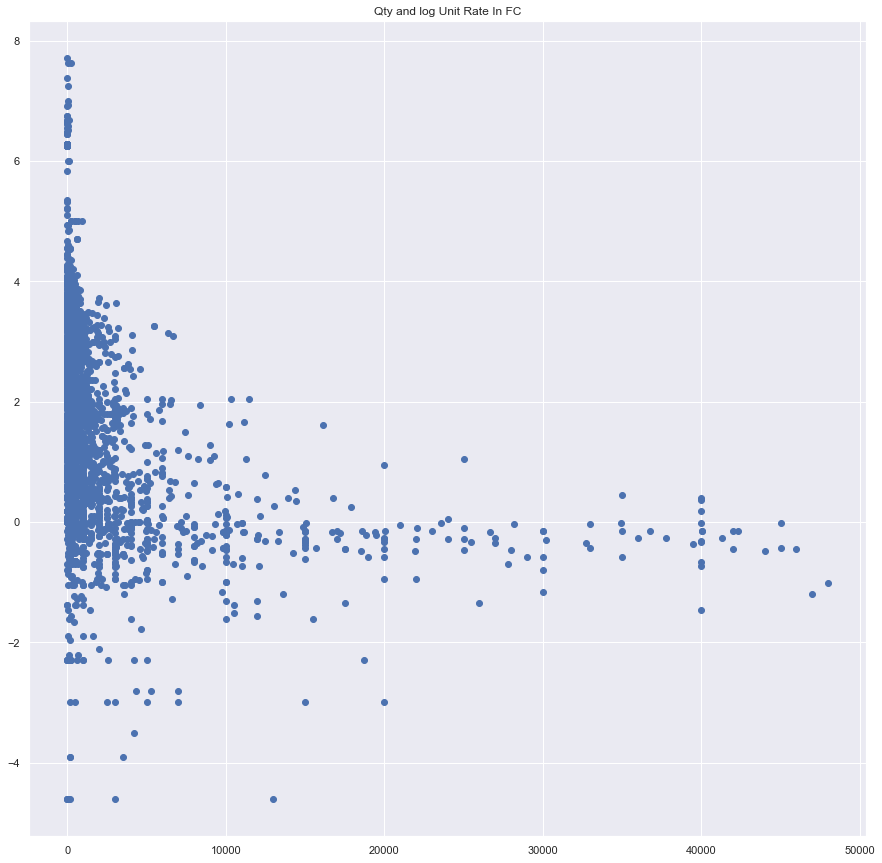

In [17]:
f,(ax1) = plt.subplots(1,1,sharey=True,figsize=(15,15))
ax1.scatter(data_cleaned['Qty'],data_cleaned['log Unit Rate In FC'])
ax1.set_title('Qty and log Unit Rate In FC')

In [36]:
targets = data_cleaned['log Unit Rate In FC']
inputs = data_cleaned.drop(['log Unit Rate In FC'],axis =1)

TypeError: 'NoneType' object is not subscriptable

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [26]:
inputs_scaled = scaler.transform(inputs)

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled,targets,test_size=0.2,random_state=365)

In [29]:

reg = LinearRegression()
reg.fit(x_train.astype(np.float32),y_train.astype(np.float32))

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').